In [ ]:
import pandas as pd
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')
from skimage.transform import resize
from skimage.io import imread
from keras.models import Sequential
from keras.layers import Conv2D,Dense,MaxPool2D,Flatten

In [ ]:
datadir='/content/drive/MyDrive/data/train'
os.listdir(datadir)

['not fractured', 'fractured']

In [ ]:
X_train=[]
Y_train=[]
categories=['not fractured', 'fractured']
for category in categories:
  path=os.path.join(datadir,category)
  #print(path)
  images=os.listdir(path)
  #print(images)
  for image in images:
    img_path=os.path.join(path,image)
    #print(img_path)
    img_array=imread(img_path)
    #print(img_array.shape)
    img_res=resize(img_array,(150,150,1))
    X_train.append(img_res)
    Y_train.append(categories.index(category))
  print("Loaded...",category)


Loaded... not fractured
Loaded... fractured


In [ ]:
datadir='/content/drive/MyDrive/data/test'
X_test=[]
Y_test=[]
categories=['not fractured', 'fractured']
for category in categories:
  path=os.path.join(datadir,category)
  images=os.listdir(path)
  for image in images:
    img_path=os.path.join(path,image)
    img_array=imread(img_path)
    img_re=resize(img_array,(150,150,1))
    X_test.append(img_re)
    Y_test.append(categories.index(category))
  print("Loaded...",category)


Loaded... not fractured
Loaded... fractured


In [ ]:
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
Y_test=np.array(Y_test)

In [ ]:
X_train.shape,Y_train.shape

((8903, 150, 150, 1), (8903,))

In [ ]:
X_test.shape,Y_test.shape

((624, 150, 150, 1), (624,))

In [ ]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(150,150,1),activation='relu'))
model.add(MaxPool2D(2,2))
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(4,activation='softmax'))

In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(X_train,Y_train,epochs=20,batch_size=12)

Epoch 1/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 361s 485ms/step - accuracy: 0.6956 - loss: 1.0131
Epoch 2/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 383s 486ms/step - accuracy: 0.9420 - loss: 0.1625
Epoch 3/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 372s 474ms/step - accuracy: 0.9872 - loss: 0.0433
Epoch 4/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 390s 485ms/step - accuracy: 0.9938 - loss: 0.0217
Epoch 5/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 375s 475ms/step - accuracy: 0.9982 - loss: 0.0104
Epoch 6/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 380s 473ms/step - accuracy: 0.9880 - loss: 0.0381
Epoch 7/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 359s 484ms/step - accuracy: 0.9968 - loss: 0.0099
Epoch 8/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 358s 483ms/step - accuracy: 1.0000 - loss: 0.0011
Epoch 9/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 375s 473ms/step - accuracy: 1.0000 - loss: 1.3860e-04
Epoch 10/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 392s 487ms/step - accuracy: 1.0000 - loss: 6.9761e-05
Epoch 11/20
742/742 ━━━━━━━━━━━━━━━━━━━━ 384s 490ms/step - accuracy: 1.0000 - loss: 4.5608e

In [ ]:
model.evaluate(X_test,Y_test)

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 192ms/step - accuracy: 0.7480 - loss: 2.5283


[3.112825870513916, 0.7147436141967773]

In [ ]:
model.save('cnn_model.h5')
from google.colab import files
files.download('cnn_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
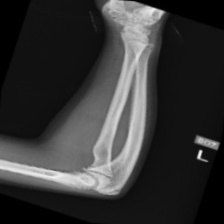

In [ ]:
img=imread('/content/drive/MyDrive/data/train/not fractured/10-rotated1-rotated1-rotated1.jpg')
img

In [ ]:
img=resize(img,(150,150,1))
img.shape

(150, 150, 1)

In [ ]:
img=img.reshape(1,150,150,1)
img.shape

(1, 150, 150, 1)

In [ ]:
Y_new=model.predict(img)
ind=Y_new.argmax()
categories[ind]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


'not fractured'